In [1]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import bokeh

In [2]:
rho = 0.5
T = 300
epsilon = np.random.normal(size=(T,))

X_st = np.zeros(T)
t = 1
while t <= T-1:
    X_st[t] = 0.5 * X_st[t-1] + epsilon[t]
    t += 1

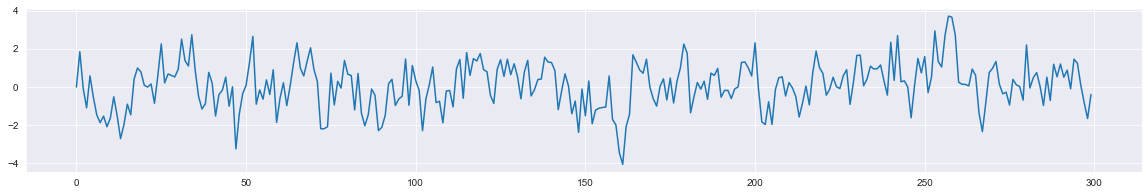

In [3]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(X_st)
plt.plot(X_st.mean())
plt.show()

In [4]:
X_lst = np.zeros(T)

m_star = lambda u:  0.9 * np.sin(2* np.pi * u)
t = 1
while t <= T-1:
    X_lst[t] = m_star(t/T) * X_lst[t-1] + epsilon[t]
    t += 1

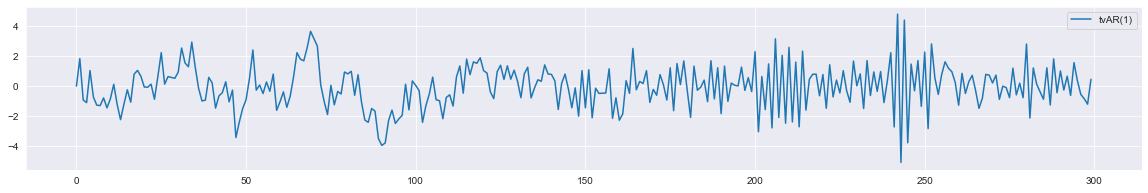

In [5]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(X_lst, label='tvAR(1)')
plt.legend()
# plt.plot(X_st.mean())
plt.show()

# tvAR(2)

In [6]:
T = 500

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)
epsilon = np.random.normal(size=(T))

m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

t = 2
while t <= T-1 :
    X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
    X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]

    t += 1

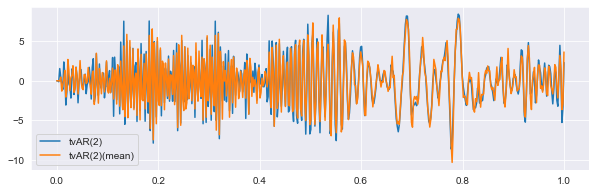

In [7]:
plt.rcParams["figure.figsize"] = (10,3)
plt.plot(u_var, X_tvar_2, label='tvAR(2)')
plt.plot(u_var, X_tvar_2_mean, label='tvAR(2)(mean)')
plt.legend()
plt.show()

$$m_{\Theta}(\frac{t}{T}, X_{t, T})= \sum_{t'=1}^{T}\sum_{j=1}^{d} \theta_{t'j} K_{1,h_{1}}(X_{t, T}^{j}-X_{t', T}^{j}) K_{2,h_{2}}(\frac{t}{T}-\frac{t'}{T})$$

In [8]:
h = 1e-4
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

kernel_h_1 = lambda X_t_T, h: KernelDensity(kernel="gaussian", bandwidth=h).fit(X_t_T.reshape(-1, 1)).score_samples(X_t_T.reshape(-1, 1))
kernel_h_2 = lambda X_t_T, h: KernelDensity(kernel="gaussian", bandwidth=h).fit(X_t_T.reshape(-1, 1)).score_samples(X_t_T.reshape(-1, 1))

def m_Theta(T, t, X_t_T, Theta, h):

    diff_t_T = X_t_T[t] - X_t_T
    diff_t_T = kernel_h_1(diff_t_T, h)
    diff_time = t/T - np.arange(T)/T
    diff_time = kernel_h_2(diff_time, h)

    print("diff_time", diff_time)
    return np.sum(Theta * diff_time * diff_t_T)

In [9]:
t = 1
T = 500
Theta = np.ones(T)
h = 1e-3
X_t_T = np.ones(T)

m_Theta(T, t, X_t_T, Theta, h)

diff_time [-0.0985679   0.0140174   0.0142813   0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131  0.01428131
  0.01428131  0.01428131  0.01428131  0.0

41.40923766446964

In [10]:
T = 500
h = 10.

m_Theta_vec = np.zeros(T)

Theta = np.random.random(T)

for t in range(T):
    m_Theta_vec[t] = m_Theta(T, t, X_tvar_2_mean, Theta, h)

diff_time [-3.22318419 -3.22317424 -3.22316433 -3.22315445 -3.22314462 -3.22313483
 -3.22312508 -3.22311537 -3.2231057  -3.22309606 -3.22308647 -3.22307692
 -3.22306741 -3.22305793 -3.2230485  -3.22303911 -3.22302976 -3.22302045
 -3.22301117 -3.22300194 -3.22299275 -3.2229836  -3.22297448 -3.22296541
 -3.22295638 -3.22294739 -3.22293843 -3.22292952 -3.22292065 -3.22291182
 -3.22290302 -3.22289427 -3.22288556 -3.22287689 -3.22286825 -3.22285966
 -3.22285111 -3.22284259 -3.22283412 -3.22282569 -3.2228173  -3.22280894
 -3.22280063 -3.22279236 -3.22278412 -3.22277593 -3.22276778 -3.22275966
 -3.22275159 -3.22274356 -3.22273556 -3.22272761 -3.2227197  -3.22271182
 -3.22270399 -3.2226962  -3.22268844 -3.22268073 -3.22267306 -3.22266542
 -3.22265783 -3.22265027 -3.22264276 -3.22263529 -3.22262785 -3.22262046
 -3.22261311 -3.22260579 -3.22259852 -3.22259128 -3.22258409 -3.22257694
 -3.22256982 -3.22256275 -3.22255571 -3.22254872 -3.22254177 -3.22253485
 -3.22252798 -3.22252114 -3.22251435 -3.2

In [11]:
# plt.plot(Theta, label='m_theta')

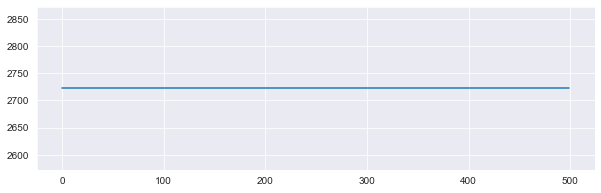

In [12]:
plt.plot(m_Theta_vec, label='m_theta')

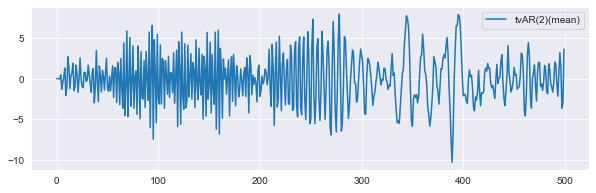

In [13]:
plt.rcParams["figure.figsize"] = (10,3)
# plt.plot(X_st, label='AR(1)')

# plt.plot(X_lst, label='tvAR(1)')
# plt.plot(X_tvar_2, label='tvAR(2)')
plt.plot(X_tvar_2_mean, label='tvAR(2)(mean)')
# plt.plot(m_Theta_vec, label='m_theta')
plt.legend()
plt.show()

In [14]:
len(X_st), len(X_lst), len(X_tvar_2)

(300, 300, 500)

## $MA(\infty)$

In [15]:
a = 0.9

T = 100

N = 1000

X_ma_infty = np.zeros(T)
X_ma_infty_u = np.zeros(T)

epsilon = np.random.normal(size=(N))

m_star = lambda u, i: a ** i * np.sin(u)
# m_star = lambda u, i: a ** i * u ** 2

t = 0
while t < T :
    vec = np.array([m_star(t/T, i)  for i in range(N)])
    lag_epsilon = np.array([epsilon[t-i] for i in range(N)])
    X_ma_infty[t] = np.sum(vec * lag_epsilon)

    t += 1

def f_X_ma_infty_u(u):
    X_ma_infty_u = np.zeros(T)
    cp = 0
    while cp < T :
        vec = np.array([m_star(u, i)  for i in range(N)])
        lag_epsilon = np.array([epsilon[cp -i] for i in range(N)])
        X_ma_infty_u[cp] = np.sum(vec * lag_epsilon)

        cp += 1
    return X_ma_infty_u

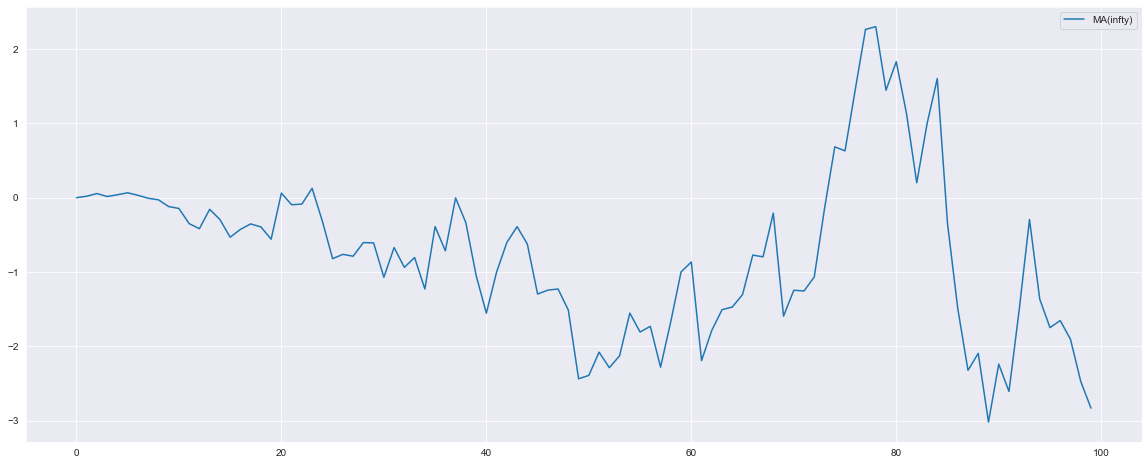

In [16]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(X_ma_infty, label='MA(infty)')
# plt.plot(X_ma_infty_u, label='MA(infty)^u')
plt.legend()
plt.show()

In [17]:
T = 100
u_var = np.linspace(0., 1., T)

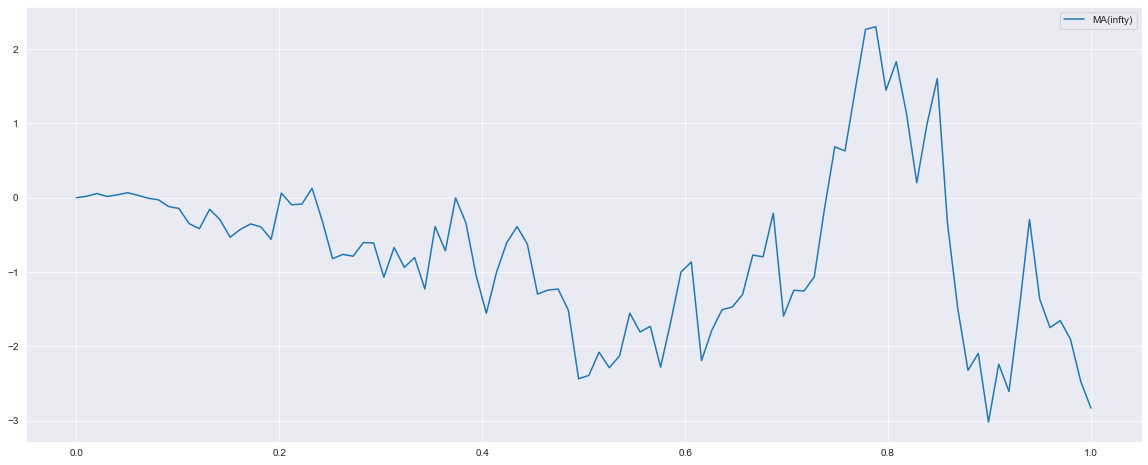

In [18]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(u_var, X_ma_infty, label='MA(infty)')
# plt.plot(X_ma_infty_u, label='MA(infty)^u')
plt.legend()
plt.show()

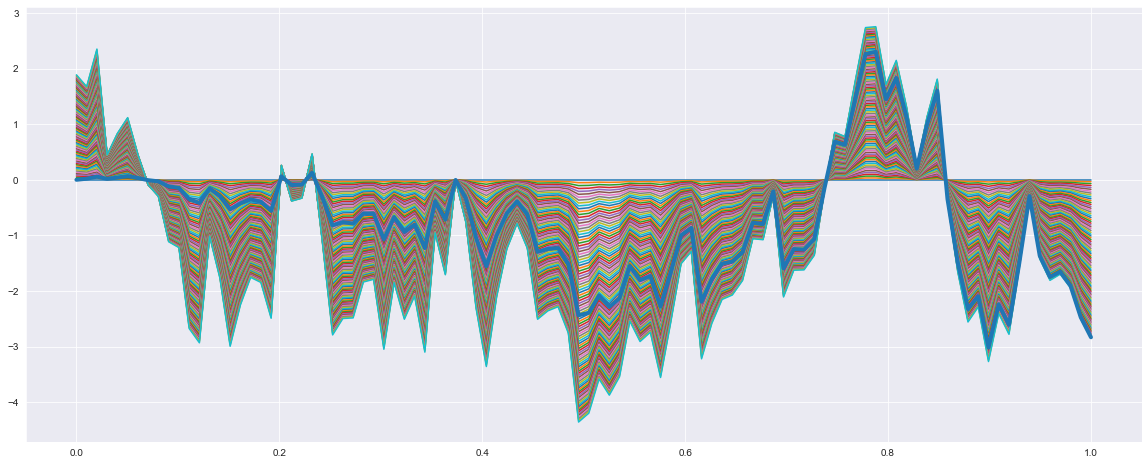

In [19]:
plt.rcParams["figure.figsize"] = (20,8)

for index in range(len(u_var)):
    plt.plot(u_var, f_X_ma_infty_u(u_var[index]), label='MA(infty)')
# plt.plot(X_ma_infty_u, label='MA(infty)^u')
# plt.legend()
plt.plot(u_var, X_ma_infty, label='MA(infty)', lw=4)
plt.show()

In [20]:
range(len(u_var))

range(0, 100)

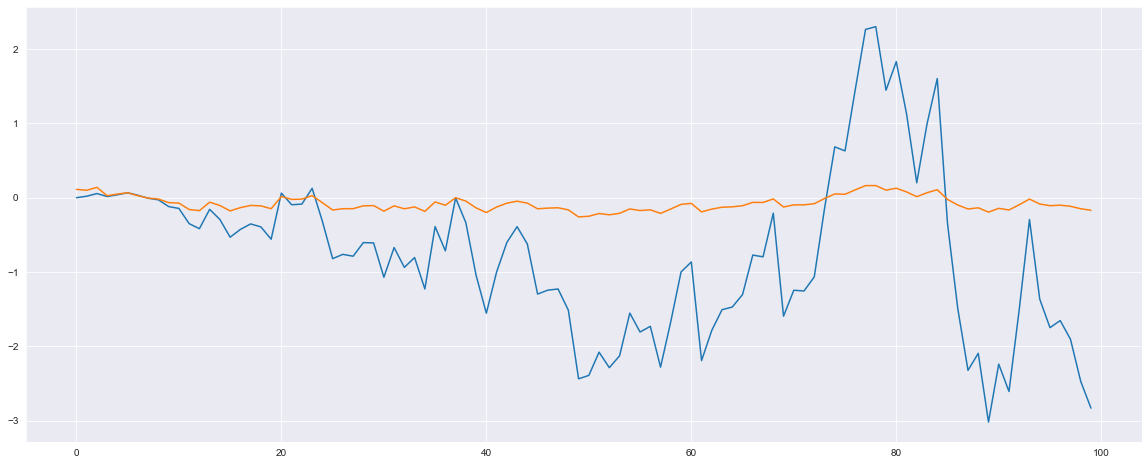

In [21]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(X_ma_infty, label='MA(infty)')

# for index in range(len(u_var)):
plt.plot(f_X_ma_infty_u(5/T), label='MA(infty)')
# plt.plot(X_ma_infty_u, label='MA(infty)^u')
# plt.legend()

plt.show()

/var/folders/nn/3q6_mtc50k76l9qmq8wsp4780000gn/T/ipykernel_59636/1666113703.py:10: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(uu, -1 - np.sqrt(1 - 4 *uu))


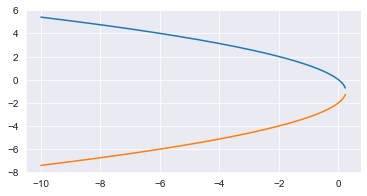

In [22]:
u = np.linspace(-10, 10, 1000)
plt.rcParams["figure.figsize"] = (6,3)
# plt.plot(u, u * (1 - u))
# plt.plot(u, 1/u)
# plt.plot(u, u)
v = u [u < 1/4]
uu = u [u < 1/2]

plt.plot(v, -1 + np.sqrt(1 - 4 * v))
plt.plot(uu, -1 - np.sqrt(1 - 4 *uu))